<a href="https://colab.research.google.com/github/Moxa13patel/Task-3-Linear-Regression/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###import needed library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
#Handle Missing Values
df.dropna(inplace=True)  # Or fillna() as appropriate

In [6]:
#Convert Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [7]:
# Encode categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

In [8]:
# Split features and target
X = df.drop("price", axis=1)
y = df["price"]

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(436, 12) (109, 12)


In [13]:
# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model score on test set
print("Model R² score on test data:", model.score(X_test, y_test))

Model R² score on test data: 0.6494754192267803



###Evaluating the Model

In [15]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.0352
R² Score: 0.6494754192267803


###Plotting the Regression Line for Linear Regression

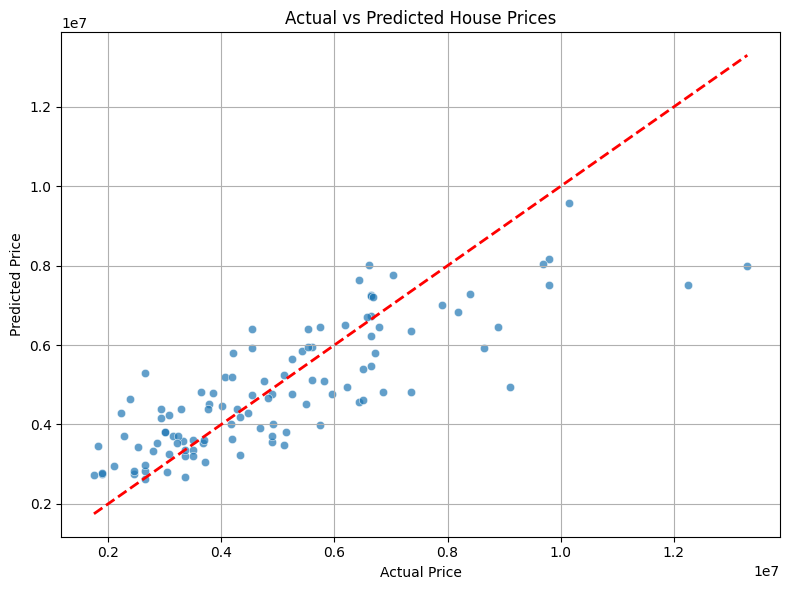

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


###Evaluating the Model

In [20]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Positive Coefficients:")
print(coefficients.head(10))

print("\nTop Negative Coefficients:")
print(coefficients.tail(10))


Top Positive Coefficients:
            Feature   Coefficient
2         bathrooms  1.097117e+06
8   airconditioning  7.855506e+05
7   hotwaterheating  6.878813e+05
10         prefarea  6.299017e+05
3           stories  4.062232e+05
6          basement  3.931598e+05
4          mainroad  3.668242e+05
5         guestroom  2.331468e+05
9           parking  2.257565e+05
1          bedrooms  7.857449e+04

Top Negative Coefficients:
             Feature    Coefficient
7    hotwaterheating  687881.310957
10          prefarea  629901.660846
3            stories  406223.164463
6           basement  393159.778726
4           mainroad  366824.192392
5          guestroom  233146.765627
9            parking  225756.513976
1           bedrooms   78574.492388
0               area     235.848772
11  furnishingstatus -210397.118272
